<a href="https://colab.research.google.com/github/utkarsh599/Recomendation-sysy/blob/Abhijeet/learningSpark6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark


In [0]:

#     http://apache.osuosl.org/spark/
#     https://www-us.apache.org/dist/spark/


In [2]:
!pip install py4j

     |████████████████████████████████| 204kB 8.6MB/s 


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

In [0]:
import pyspark

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from pyspark.sql import SparkSession


In [0]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
comments1 =  spark.read.csv("/content/gdrive/My Drive/Colab Notebooks/GBcomments.csv", inferSchema=True, header=True)

In [0]:
comments2= spark.read.csv("/content/gdrive/My Drive/Colab Notebooks/UScomments.csv", inferSchema=True, header=True)

In [11]:
comments1.show(5)

+-----------+--------------------+-----+-------+
|   video_id|        comment_text|likes|replies|
+-----------+--------------------+-----+-------+
|jt2OHQh0HoQ|It's more accurat...|    0|      0|
|jt2OHQh0HoQ|To be there with ...|    1|      0|
|jt2OHQh0HoQ|Thank gosh, a pla...|    0|      0|
|jt2OHQh0HoQ|What happened to ...|    0|      0|
|jt2OHQh0HoQ|Power is the dise...|    0|      0|
+-----------+--------------------+-----+-------+
only showing top 5 rows



In [12]:
type(comments1)

pyspark.sql.dataframe.DataFrame

In [0]:
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

comments=unionAll(comments1,comments2)

In [14]:
comments.count()

1410466

In [15]:
comments_rdd = comments.select('comment_text').rdd.flatMap(lambda x: x)
comments_rdd=comments_rdd.filter(lambda x: x is not None).filter(lambda x: x!='')
comments_rdd.take(5)

["It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10).",
 'To be there with a samsung phone\\n😂😂😂',
 'Thank gosh, a place I can watch it without having to be at HD... my speed doesn’t support HD',
 'What happened to the home button on the iPhone X? *****Cough****copying Samsung******cough',
 'Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.']

In [0]:
header = comments_rdd.first()

In [0]:
data_rmv_col = comments_rdd.filter(lambda row: row != header)

In [0]:
def lower(x):
  return x.lower()

In [0]:
lowerCase_sentRDD = data_rmv_col.map(lower)

In [20]:
lowerCase_sentRDD.take(5)

['to be there with a samsung phone\\n😂😂😂',
 'thank gosh, a place i can watch it without having to be at hd... my speed doesn’t support hd',
 'what happened to the home button on the iphone x? *****cough****copying samsung******cough',
 'power is the disease.\xa0 care is the cure.\xa0 keep caring for yourself and others as best as you can.\xa0 this is life.',
 'keep calm and buy iphone 8 keep calm and buy iphone 8 plus keep calm and buy iphone x. what is your favourite?']

In [0]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [0]:
def sent_TokenizeFunct(x):
    doc=nlp(x)
    #return doc
    tokens=[]
    for token in doc:
      if((token.is_stop==False and token.is_punct==False) and token.is_alpha==True):
        tokens.append(token.lemma_)
    return ' '.join(tokens)
    
sentenceTokenizeRDD = lowerCase_sentRDD.map(sent_TokenizeFunct)

In [23]:
sentenceTokenizeRDD.take(5)

['samsung',
 'thank gosh place watch have hd speed support hd',
 'happen home button iphone x',
 'power disease care cure care best life',
 'calm buy iphone calm buy iphone plus calm buy iphone favourite']

# Working on Videos

In [0]:
Videos1 =  spark.read.csv("/content/gdrive/My Drive/Colab Notebooks/GBvideos.csv", inferSchema=True, header=True)
Videos2 =  spark.read.csv("/content/gdrive/My Drive/Colab Notebooks/USvideos.csv", inferSchema=True, header=True)
videos = unionAll(Videos1,Videos2)

In [25]:
videos.show(5)

+-----------+--------------------+-----------------+-----------+--------------------+-------+-----+--------+-------------+--------------------+-----+
|   video_id|               title|    channel_title|category_id|                tags|  views|likes|dislikes|comment_total|      thumbnail_link| date|
+-----------+--------------------+-----------------+-----------+--------------------+-------+-----+--------+-------------+--------------------+-----+
|jt2OHQh0HoQ|Live Apple Event ...|      Apple Event|         28|apple events|appl...|7426393|78240|   13548|          705|https://i.ytimg.c...|13.09|
|AqokkXoa7uE|Holly and Phillip...|     This Morning|         24|this morning|inte...| 494203| 2651|    1309|            0|https://i.ytimg.c...|13.09|
|YPVcg45W0z4|My DNA Test Resul...|     emmablackery|         24|emmablackery|emma...| 142819|13119|     151|         1141|https://i.ytimg.c...|13.09|
|T_PuZBdT2iM|getting into a co...|            ProZD|          1|skit|korean|langu...|1580028|65729| 

In [26]:
videos_rdd = videos.select(['title']).rdd.flatMap(lambda x: x)
videos_rdd = videos_rdd.filter(lambda x: x is not None).filter(lambda x: x!='')
videos_rdd.take(5)

['Live Apple Event - Apple September Event 2017 - iPhone 8, iPhone X, iOS 11 - Apple Keynote',
 'Holly and Phillip Meet Samantha the Sex Robot | This Morning',
 "My DNA Test Results! I'm WHAT?!",
 "getting into a conversation in a language you don't actually speak that well",
 'Baby Name Challenge!']

In [0]:
header_Vid=videos_rdd.first()

In [0]:
data_rmv_col_vid = videos_rdd.filter(lambda row: row != header_Vid)

In [0]:
lowerCase_VidRDD = data_rmv_col_vid.map(lower)

In [30]:
lowerCase_VidRDD.take(5)

['holly and phillip meet samantha the sex robot | this morning',
 "my dna test results! i'm what?!",
 "getting into a conversation in a language you don't actually speak that well",
 'baby name challenge!',
 "revealed - fifa 18 stats for chelsea's hazard, luiz & christensen!"]

In [0]:
Vid_sentTokenizeRDD = lowerCase_VidRDD.map(sent_TokenizeFunct)

In [32]:
Vid_sentTokenizeRDD.take(5)

['holly phillip meet samantha sex robot morning',
 'dna test result',
 'get conversation language actually speak',
 'baby challenge',
 'reveal fifa stat chelsea hazard luiz christensen']

In [33]:
tags_rdd=videos.select(['tags']).rdd.flatMap(lambda x:x)
tags_rdd.take(5)

['apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11',
 'this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life',
 'emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry',
 "skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial",
 'sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names']

In [0]:
header_tags = tags_rdd.first()

In [0]:
tags_rmv_col = tags_rdd.filter(lambda row: row != header_tags)

In [36]:
tags_rmv_col.take(5)

['this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life',
 'emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry',
 "skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial",
 'sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names',
 'Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David Luiz Fifa 18|Christensen Fifa 18|Chelsea Fifa 18|Pack Opening|Fifa Pack

In [0]:
def split1(x):
  return (x.split("|"))

tags_rdd=tags_rmv_col.map(split1)

In [0]:
from pyspark.sql import Row
from pyspark.sql.functions import monotonically_increasing_id

row_title = Row("LemmetizeTitle") # Or some other column name
Title_DF = Vid_sentTokenizeRDD.map(row_title).toDF()
Title_DF = Title_DF.select("*").withColumn("id", monotonically_increasing_id())

row_tags=Row("Tokenized_Tags")
Tags_DF=tags_rdd.map(row_tags).toDF()
Tags_DF = Tags_DF.select("*").withColumn("id", monotonically_increasing_id())

In [39]:
Title_DF.show(5)

+--------------------+---+
|      LemmetizeTitle| id|
+--------------------+---+
|holly phillip mee...|  0|
|     dna test result|  1|
|get conversation ...|  2|
|      baby challenge|  3|
|reveal fifa stat ...|  4|
+--------------------+---+
only showing top 5 rows



In [40]:
Tags_DF.show(5)

+--------------------+---+
|      Tokenized_Tags| id|
+--------------------+---+
|[this morning, in...|  0|
|[emmablackery, em...|  1|
|[skit, korean, la...|  2|
|[sprinkleofglitte...|  3|
|[Rio Ferdinand, R...|  4|
+--------------------+---+
only showing top 5 rows



In [41]:
Tags_DF[['Tokenized_Tags']]

DataFrame[Tokenized_Tags: array<string>]

In [0]:
videos_DF = Title_DF.join(Tags_DF, on=['id'], how='left_outer')

In [43]:
videos_DF.show(5)

+----+--------------------+--------------------+
|  id|      LemmetizeTitle|      Tokenized_Tags|
+----+--------------------+--------------------+
|  26|testing soph x ma...|[grey hair, sophd...|
|  29|move vlog pink ho...|[moving vlog, ike...|
| 474|doom wolfenstein ...|[PC, IGN, PS4, Do...|
| 964|lloyd new lego ni...|[Google, YouTube,...|
|1677|project car ceo q...|[Project Cars 2 G...|
+----+--------------------+--------------------+
only showing top 5 rows



In [44]:
videos_DF.count()

15989

In [45]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer


tokenizer = Tokenizer(inputCol="LemmetizeTitle", outputCol="words")
wordsData = tokenizer.transform(videos_DF)

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=5)
featurizedData = hashingTF.transform(wordsData)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("id", "features").show()

+----+--------------------+
|  id|            features|
+----+--------------------+
|  26|(5,[0,1,2,3,4],[0...|
|  29|(5,[0,1,2,4],[0.3...|
| 474|(5,[0,1,2,3],[0.7...|
| 964|(5,[0,1,4],[1.419...|
|1677|(5,[0,1,2,3,4],[0...|
|1697|(5,[0,1,2,4],[0.3...|
|1806|(5,[1,2,3,4],[0.3...|
|1950|(5,[1,3,4],[0.750...|
|2040|(5,[0,1],[1.06440...|
|2214|(5,[3,4],[0.45814...|
|2250|(5,[0,1,4],[0.354...|
|2453|(5,[0,2,3],[0.354...|
|2509|(5,[1,3,4],[1.126...|
|2529|(5,[0,2,4],[2.128...|
|2927|(5,[0,1,3],[0.354...|
|3091|(5,[0,1,2,3,4],[0...|
|3506|(5,[0,1,2,3,4],[1...|
|3764|(5,[0,4],[0.70960...|
|4590|(5,[0,1,4],[0.709...|
|4823|(5,[0,3,4],[0.354...|
+----+--------------------+
only showing top 20 rows



In [46]:
rescaledData.select("id", "features").show(n=5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------
 id       | 26                                                                                                                   
 features | (5,[0,1,2,3,4],[0.35480052914438215,0.37534179192543426,0.48835740044961995,1.3744254057774885,0.40377797676786836]) 
-RECORD 1------------------------------------------------------------------------------------------------------------------------
 id       | 29                                                                                                                   
 features | (5,[0,1,2,4],[0.35480052914438215,1.1260253757763028,0.48835740044961995,1.211333930303605])                         
-RECORD 2------------------------------------------------------------------------------------------------------------------------
 id       | 474                                                                           

In [0]:
trainSDF,validationSDF,TestSDF=rescaledData.select("id","Tokenized_tags").randomSplit([0.75, 0.2, 0.05])

In [48]:
trainSDF.show(5)

+----+--------------------+
|  id|      Tokenized_tags|
+----+--------------------+
|  26|[grey hair, sophd...|
| 474|[PC, IGN, PS4, Do...|
|1677|[Project Cars 2 G...|
|1806|[wwe, world wrest...|
|1950|[Norm macdonald, ...|
+----+--------------------+
only showing top 5 rows



In [49]:
validationSDF.show(5)

+----+--------------------+
|  id|      Tokenized_tags|
+----+--------------------+
| 964|[Google, YouTube,...|
|1697|[Shakira ft. Nick...|
|4894|[Linkin Park, One...|
|7279|[carlibel55, carl...|
|7747|[MinuteEarth, Min...|
+----+--------------------+
only showing top 5 rows



In [51]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, MinHashLSH
import pyspark.sql.functions as f

model = Pipeline(stages=[
        HashingTF(inputCol="Tokenized_tags", outputCol="vectors"),
        MinHashLSH(inputCol="vectors", outputCol="lsh", numHashTables=10)
    ]).fit(TestSDF)

db_hashed = model.transform(TestSDF)

db_matches = model.stages[-1].approxSimilarityJoin(db_hashed, db_hashed, 0.9)

#show all matches (including duplicates)
db_matches.select(f.col('datasetA.id').alias('video_id_A'),
                 f.col('datasetB.id').alias('video_id_B'),
                 f.col('distCol')).show()


+----------+----------+------------------+
|video_id_A|video_id_B|           distCol|
+----------+----------+------------------+
|8589941814|8589939951|0.8571428571428572|
|      5400|8589939314|               0.0|
|8589939959|      2471|               0.0|
|8589938407|      5176|               0.0|
|8589940332|8589936344|               0.0|
|      6691|      1465|               0.0|
|      6691|      7322|               0.0|
|      2376|      4506|               0.0|
|      1465|      7456|               0.0|
|      1465|8589935934|               0.0|
|      2471|8589941945|               0.0|
|      7456|      2376|               0.0|
|      4669|8589941665|               0.0|
|8589935934|      7322|               0.0|
|8589938941|8589938562|               0.0|
|8589938941|      2376|               0.0|
|8589936344|8589940332|               0.0|
|      6929|8589938562|               0.0|
|       717|      4936|               0.0|
|8589937932|8589940332|               0.0|
+----------

In [52]:
from pyspark.sql.functions import col
#show non-duplicate matches
ans=db_matches.select(f.col('datasetA.id').alias('video_id_A'),
                 f.col('datasetB.id').alias('video_id_B'),
                 f.col('distCol')).filter('video_id_A < video_id_B')

ans=ans.sort(col("distCol").desc())
ans.show()

+----------+----------+------------------+
|video_id_A|video_id_B|           distCol|
+----------+----------+------------------+
|8589936937|8589937690|0.8979591836734694|
|      4843|8589942495|0.8979591836734694|
|       110|8589935872|0.8974358974358975|
|       677|      5857|0.8974358974358975|
|      2844|      3213|0.8974358974358975|
|      2844|8589939557|0.8974358974358975|
|8589938872|8589940023| 0.896551724137931|
|8589936156|8589936271|0.8947368421052632|
|      1529|8589934899|0.8947368421052632|
|8589935447|8589936271|0.8947368421052632|
|      2087|8589939420|0.8947368421052632|
|       641|8589941634|0.8947368421052632|
|      1763|8589934899|0.8947368421052632|
|      1763|8589935151|0.8947368421052632|
|      4646|      6789|0.8947368421052632|
|       641|8589941193|0.8947368421052632|
|      7164|      7864|0.8947368421052632|
|8589936271|8589936870|0.8947368421052632|
|      1529|8589935151|0.8947368421052632|
|      1611|8589939420|0.8947368421052632|
+----------

In [0]:
# ans.select('*').where(col('video_id_A')=="6942").show()

In [0]:
ans=ans.filter(ans.distCol>=0.5)

In [0]:
ans = ans.sort(col("video_id_A").desc())

In [58]:
ans.show()

+----------+----------+------------------+
|video_id_A|video_id_B|           distCol|
+----------+----------+------------------+
|8589941403|8589942076|0.7571428571428571|
|8589941125|8589942018|0.7941176470588236|
|8589940400|8589942487|0.6764705882352942|
|8589940400|8589942015|0.6764705882352942|
|8589940208|8589941403|0.5428571428571429|
|8589940208|8589942076|0.7638888888888888|
|8589940010|8589941814|0.8888888888888888|
|8589939951|8589940010|0.8888888888888888|
|8589939951|8589941814|0.8571428571428572|
|8589939856|8589940503|0.8688524590163934|
|8589939794|8589940749|               0.8|
|8589939350|8589942101|0.6470588235294117|
|8589939282|8589942115|0.8571428571428572|
|8589939193|8589941810|0.6842105263157895|
|8589939193|8589942515|0.6842105263157895|
|8589939193|8589941688|             0.675|
|8589939173|8589941311|0.8571428571428572|
|8589939019|8589939128|0.6666666666666667|
|8589939011|8589940400|0.8823529411764706|
|8589939011|8589942015|             0.875|
+----------

# STOP

In [76]:
comments.head()

Row(video_id='jt2OHQh0HoQ', comment_text="It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10).", likes='0', replies='0')

In [0]:
counts=comments.select("video_id").toPandas()['video_id'].value_counts()

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
counts.head()

LunHybOKIjU    2000
CYoRmfI0LUc    1700
sjlHnJvXdQs    1700
t8sgy0faXyg    1700
Q0CbN8sfihY    1699
Name: video_id, dtype: int64

In [0]:
counts1=counts.values.reshape(-1,1)

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

counts2 = scaler.fit_transform(counts1)

In [0]:
temp=[]
for i in counts2:
  temp.extend(i)

In [163]:
type(counts)

pandas.core.series.Series

In [0]:
df=pd.DataFrame(counts.index,pd.Series(temp),columns=['x'])

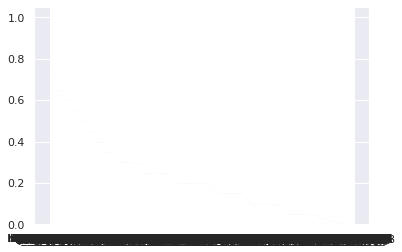

In [172]:
plt.bar(df['x'],list(df.index))

plt.show()

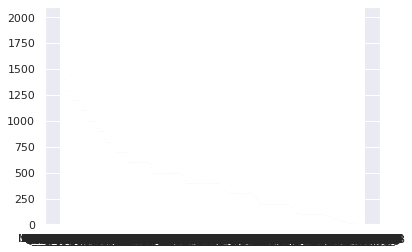

In [179]:
plt.bar(counts.index,counts)
plt.plot(color='blue')
plt.show()

In [0]:
df=pd.DataFrame(['1','2','3','4'],['a','b','c','d'])

TypeError: ignored

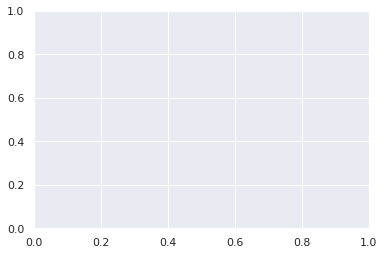

In [176]:
plt.bar(df,df.index)
plt.show()

In [0]:
# tf.cache()
# idf = IDF().fit(tf)
# tfidf = idf.transform(tf)
# from pyspark.ml.feature import Normalizer
# normalizer = Normalizer(inputCol="feature", outputCol="norm")
# data = normalizer.transform(tfidf)

In [0]:
# data.show(5)

In [0]:

# from pyspark.sql.types import DoubleType

In [0]:
# import pyspark.sql.functions as psf
# from pyspark.sql.functions import col
# dot_udf = psf.udf(lambda x,y: float(x.dot(y)), DoubleType())
# result=data.alias("i").join(data.alias("j"), psf.col("i.ID") < psf.col("j.ID"))
# result=result.select(
#         psf.col("i.ID").alias("i"), 
#         psf.col("j.ID").alias("j"), 
#         dot_udf("i.norm", "j.norm").alias("dot"))
    
# # result=result.sort("i", "j")

# result=result.sort(col("dot").desc())
# result.show()

In [0]:

# result.sort(col("dot").desc())

In [0]:
# content based recommender system
# steps: 
# 1) lower case whole dataset
# 2) remove stopwords
# 3) create bag of words vectors in binary format 1/0
# 4) calc cosine sim for all articles and find top 3 closest articles
# 5) sort article ids with descen simi and removing same article id
# 6) created recommendation column with top 3 article id's